# Lambda School Data Science - Unit 2 Sprint 1 Module 1

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

In [31]:
# df = wrangle(DATA_PATH + 'condos/tribeca.csv')
# url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/condos/tribeca.csv'

# df = pd.read_csv(url,
#                  parse_dates= ['SALE_DATE'],
#                  index_col='SALE_DATE',
#                  dtype={'ZIP_CODE':int,
#                         'YEAR_BUILT':int})

import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# I. Wrangle Data

In [32]:
df = pd.read_csv(DATA_PATH + 'condos/tribeca.csv')

In [33]:
def wrangle(filepath):
  df = pd.read_csv(filepath,
                   parse_dates=['SALE_DATE'],
                   index_col=['SALE_DATE'],
                   na_values=[0.0])

  #drop columns that have a constant value
  df.drop(columns=['NEIGHBORHOOD','BUILDING_CLASS_CATEGORY'], inplace=True)

  # drop HHCs
  df.drop(columns=['ADDRESS','APARTMENT_NUMBER'], inplace=True)

  return df

df = wrangle(DATA_PATH + 'condos/tribeca.csv')

In [34]:
df.head()

,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,
2019-01-03,10013.0,1840.0,1909.0,2800000
2019-01-07,10004.0,1759.0,NaN,2650000
2019-01-09,10004.0,1190.0,2005.0,1005000
2019-01-10,NaN,1088.0,2006.0,1678000
2019-01-11,10280.0,873.0,NaN,1380000


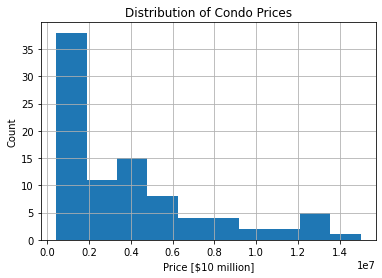

In [35]:
df['SALE_PRICE'].hist()
plt.xlabel('Price [$10 million]')
plt.ylabel('Count')
plt.title('Distribution of Condo Prices');

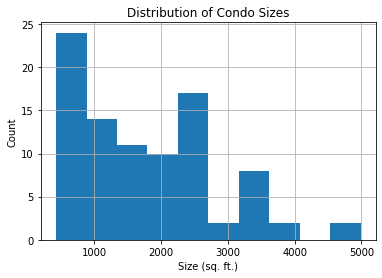

In [36]:
df['GROSS_SQUARE_FEET'].hist()
plt.xlabel('Size (sq. ft.)')
plt.ylabel('Count')
plt.title('Distribution of Condo Sizes');

Text(0, 0.5, 'SALE_PRICE')

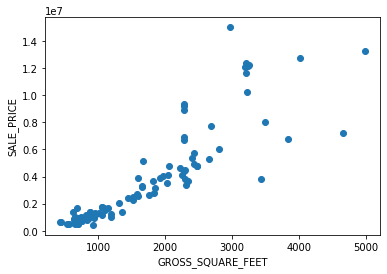

In [37]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE')

# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [38]:
y = df['SALE_PRICE'] # 1D
X = df[['GROSS_SQUARE_FEET']] # 2D (Feature Matrix Always needs 2 Dimentions)

# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [39]:
# What's our guess?
y_mean = y.mean()
print('Mean condo price', y_mean)

y_pred = [y_mean] * len(y)

print('Baseline MAE:', mean_absolute_error(y,y_pred))

Mean condo price 3928736.3666666667
Baseline MAE: 2783380.1977777784


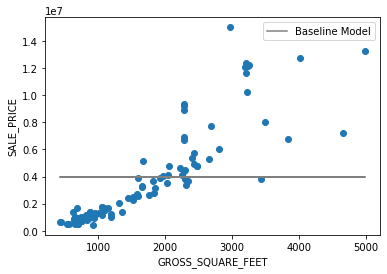

In [40]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(df['GROSS_SQUARE_FEET'], y_pred,
         label='Baseline Model',
         color='grey')
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE')
plt.legend();


# IV. Build Model

In [41]:
#Step 1: Import predictor Class
from sklearn.linear_model import LinearRegression

#Step 2: Instanciate Predictor
model = LinearRegression()

#Step 3: Fit yopur predictor on the (Training) data
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
model.predict([[1000],[1500], [2000]])

array([1571083.61456045, 3109307.44226995, 4647531.26997945])

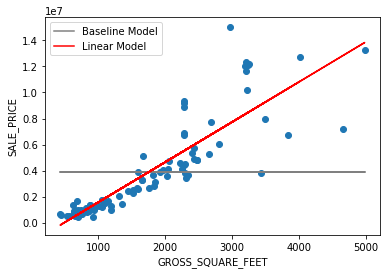

In [43]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(X, y_pred,
         label='Baseline Model',
         color='grey')
plt.plot(X, model.predict(X),
         label='Linear Model',
         color='red')
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE')
plt.legend();


# V. Check Metrics

In [44]:
print('Training MAE:',mean_absolute_error(y, model.predict(X)))

Training MAE: 1176817.9930150746


# VI. Communicate Results

Plot model

In [45]:
f'PRICE = {model.intercept_} + {model.coef_} * SQFT'

'PRICE = -1505364.0408585514 + [3076.44765542] * SQFT'

What are our beta coefficients?